In [2]:
# pip install matplotlib

In [3]:
# pip install pip --upgrade

In [4]:
# pip install --upgrade matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class labels', 'Alcohol', 'Malic Acid']

In [7]:
df

,Class labels,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# Normalization

<AxesSubplot: >

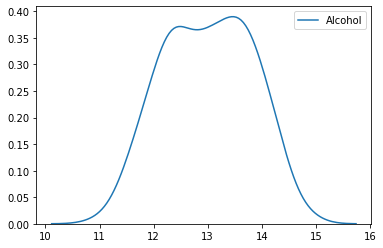

In [8]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot: >

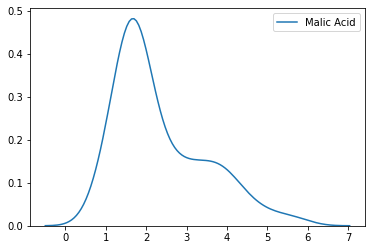

In [9]:
sns.kdeplot(df['Malic Acid'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic Acid'>

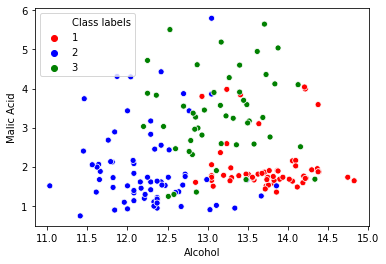

In [10]:
color_dict={1:'red', 2:'blue', 3:'green'}
sns.scatterplot(df['Alcohol'], df['Malic Acid'], hue= df['Class labels'], palette=color_dict)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class labels', axis=1), df['Class labels'],
                                                   test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


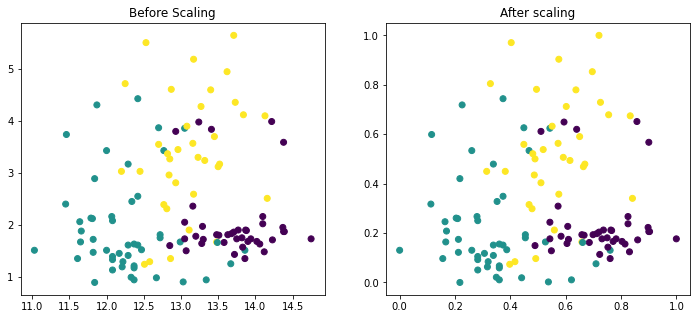

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c =  y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c = y_train)
ax2.set_title('After scaling')
plt.show()

<AxesSubplot: title={'center': 'After scaling'}>

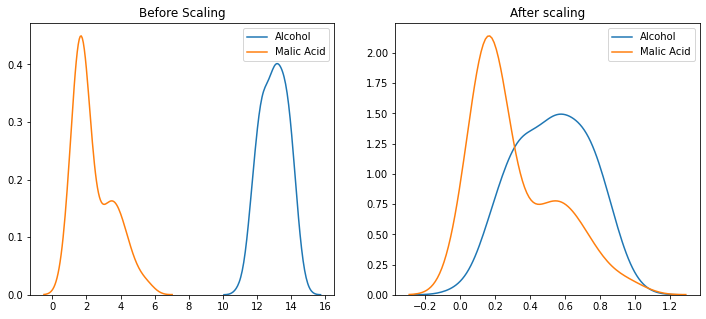

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax= ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax= ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)

<AxesSubplot: title={'center': 'Alcohol Distribution After scaling'}>

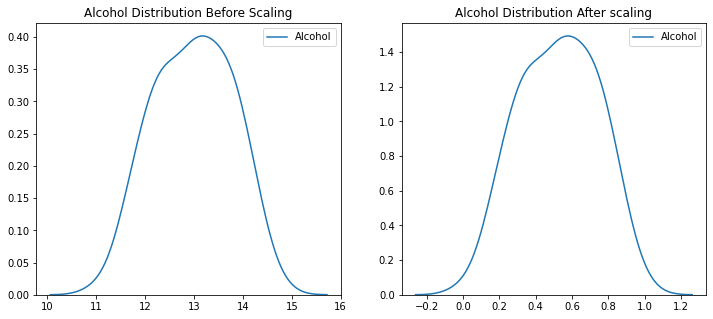

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax= ax1)

ax2.set_title('Alcohol Distribution After scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax= ax2)

<AxesSubplot: title={'center': 'Malic acid distribution After scaling'}>

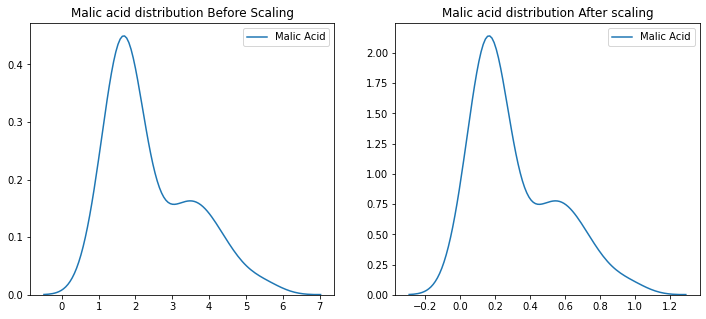

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Malic acid distribution Before Scaling")
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

ax2.set_title('Malic acid distribution After scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)

# Standardization

In [20]:
df= pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],
                                                   test_size=0.3, random_state =0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [26]:
#Standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [28]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [29]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [30]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [31]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [32]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


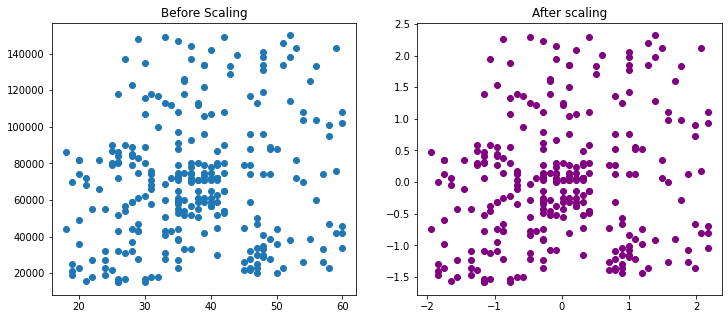

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='purple')
ax2.set_title("After scaling")
plt.show()

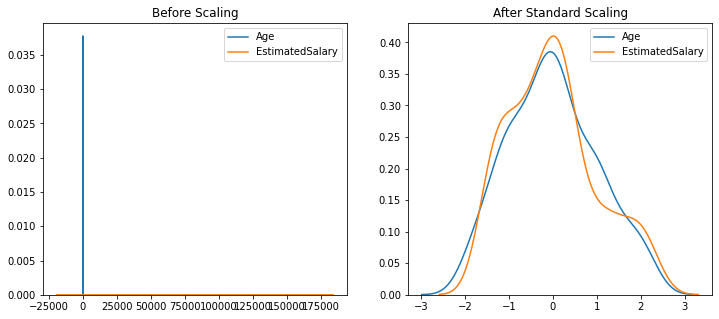

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

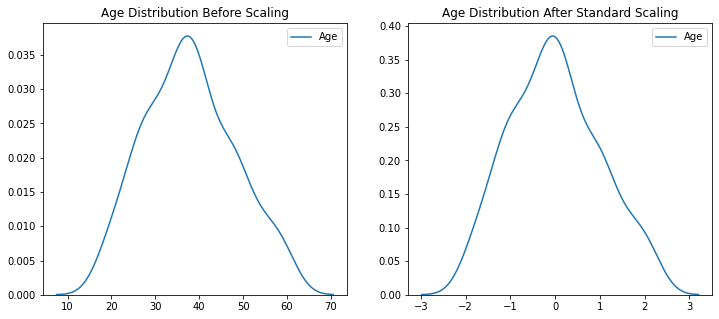

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

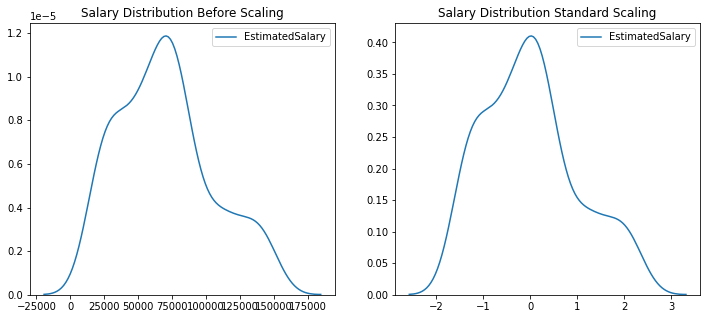

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Ordinal and label encoding

In [50]:
df= pd.read_csv('customer.csv')

In [51]:
df.sample(5)

,age,gender,review,education,purchased
16,59,Male,Poor,UG,Yes
41,23,Male,Good,PG,Yes
5,31,Female,Average,School,Yes
18,19,Male,Good,School,No
9,74,Male,Good,UG,Yes


In [52]:
df=df.iloc[:,2:]
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.3)

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
oe = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'],['School', 'UG', 'PG']])

In [57]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [58]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [59]:
X_train

array([[0., 2.],
       [1., 2.],
       [0., 1.],
       [2., 1.],
       [2., 0.],
       [1., 0.],
       [2., 2.],
       [0., 2.],
       [2., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [1., 1.],
       [1., 2.],
       [0., 0.],
       [0., 2.],
       [2., 1.],
       [2., 2.],
       [1., 1.],
       [2., 0.],
       [0., 2.],
       [2., 2.],
       [0., 2.],
       [0., 0.],
       [1., 0.],
       [1., 2.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [0., 1.]])

In [60]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
le.fit(y_train)

LabelEncoder()

In [64]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [65]:
y_train  = le.transform(y_train)
y_test = le.transform(y_test)

In [66]:
y_train

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

# One hot encoding

In [87]:
df =pd.read_csv('cars.csv')

In [88]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [89]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Ashok               1
Peugeot             1
Name: brand, dtype: int64

In [90]:
df['brand'].nunique()

32

In [91]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [92]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

### One hot encoding using pandas

In [93]:
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True)#drop_first: remove multicollinearity

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


### One hot encoding using Sklearn

In [94]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size=0.2, random_state=2)

In [95]:
X_train

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner
...,...,...,...,...
3606,Ford,35000,Diesel,First Owner
5704,Maruti,120000,Petrol,First Owner
6637,Tata,15000,Petrol,First Owner
2575,Maruti,32500,Diesel,Second Owner


In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [98]:
X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']])

In [100]:
# X_test_new = ohe.transform(X_test[['fuel','owner']])

In [101]:
X_train_new.shape

(6502, 7)

In [102]:
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [104]:
#One hot encoding with top categories
counts = df['brand'].value_counts()

In [105]:
df['brand'].nunique()
threshold = 100

In [106]:
repl = counts[counts <= threshold].index

In [107]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
8065,0,1,0,0,0,0,0,0,0,0,0,0,0
7279,0,0,0,0,0,0,0,0,0,0,0,1,0
3688,0,0,0,0,0,0,1,0,0,0,0,0,0
7371,0,0,0,0,0,0,1,0,0,0,0,0,0
161,0,0,0,0,0,0,1,0,0,0,0,0,0


# Column Transformer

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_csv('covid_toy.csv')

In [5]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [6]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['has_covid']), df['has_covid'], test_size=0.2)

In [9]:
X_train

,age,gender,fever,cough,city
74,34,Female,104.0,Strong,Delhi
35,82,Female,102.0,Strong,Bangalore
10,75,Female,NaN,Mild,Delhi
12,25,Female,99.0,Strong,Kolkata
87,47,Male,101.0,Strong,Bangalore
...,...,...,...,...,...
56,71,Male,NaN,Strong,Kolkata
31,83,Male,103.0,Mild,Kolkata
37,55,Male,100.0,Mild,Kolkata
64,42,Male,104.0,Mild,Mumbai


In [10]:
#Simple imputer: Fever
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.fit_transform(X_test[['fever']])

In [11]:
#Ordinal Encoding: Cough
oe = OrdinalEncoder(categories=[['Mild', 'Strong']])

X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.fit_transform(X_test[['cough']])

In [12]:
#One hot Encoding: Gender, City
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])
X_test_gender_city = ohe.transform(X_test[['gender', 'city']])

In [13]:
#Extracting age
X_train_age = X_train.drop(columns=['gender', 'fever', 'cough', 'city']).values
X_test_age = X_test.drop(columns=['gender', 'fever', 'cough', 'city']).values


In [14]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough), axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough), axis=1)

In [15]:
X_train_transformed

array([[ 34.        , 104.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   1.        ],
       [ 82.        , 102.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 75.        , 100.85915493,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ],
       [ 25.        ,  99.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   1.        ],
       [ 47.        , 101.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 64.        ,  98.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 16.        , 104.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 19.        , 100.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 34.        ,  98.        ,   1.        ,   0.        ,
          1.    

### Using column transformer

In [16]:
from sklearn.compose import ColumnTransformer

In [23]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3', OneHotEncoder(sparse=False, drop='first'),['gender', 'city'])], 
        remainder='passthrough')

In [24]:
transformer.fit_transform(X_train)

array([[104.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  34.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  82.        ],
       [100.85915493,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  75.        ],
       [ 99.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  25.        ],
       [101.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  47.        ],
       [ 98.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  64.        ],
       [104.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  16.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  19.        ],
       [ 98.        ,   1.        ,   1.        ,   0.        ,
          1.    